<a href="https://colab.research.google.com/github/9-coding/DataScience/blob/main/linear_regression_holdout_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## linear_regression_holdout_evaluation

* Using a linear regression model, predict and evaluate the delivery time based on distance. 
* linear_regression_data dataset with 30 records
* attributes: distance, delivery time(target)
* Split the dataset into 4/5 (then 3/5) for training and 1/5 (2/5) for testing.
* Evaluate the model using the holdout method, with the shuffle and stratify options in dataset split.

In [2]:
#drive mount
#구글 드라이브를 colab에서 사용할 수 있도록 마운트
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt')

Mounted at /content/mnt


In [3]:
%cd /content/mnt/MyDrive/Colab Notebooks/DataScience/dataset/

/content/mnt/MyDrive/Colab Notebooks/DataScience/dataset


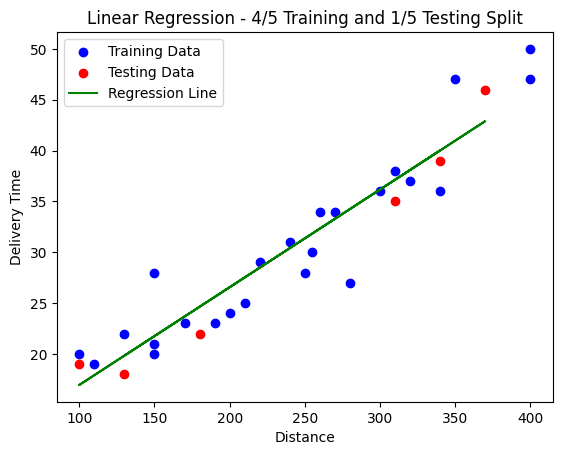

Test Size: 0.2
Mean Squared Error: 4.945721696712986



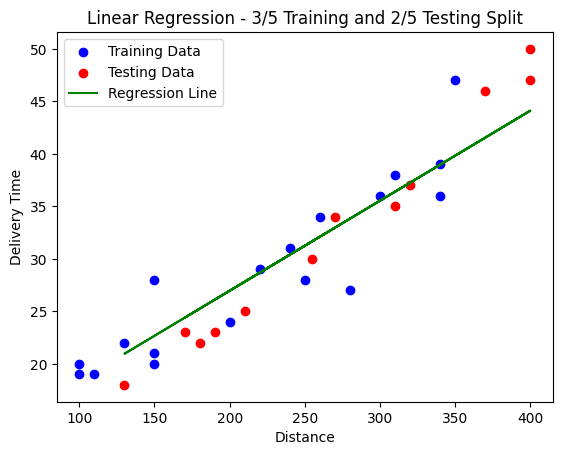

Test Size: 0.4
Mean Squared Error: 8.970029245910787



In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/DataScience/dataset/linear_regression_data.csv')

# Split the dataset into training and testing sets
X = data[['Distance']]
y = data[['Delivery Time']]

def linear_regression(test_size=0.2):
    # Split the dataset into training and testing sets with shuffle and stratify options
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=None)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    # Plot the results
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='red', label='Testing Data')
    plt.plot(X_test, y_pred, color='green', label='Regression Line')
    plt.xlabel('Distance')
    plt.ylabel('Delivery Time')
    if test_size == 0.2:
        plt.title('Linear Regression - 4/5 Training and 1/5 Testing Split')
    elif test_size == 0.4:
        plt.title('Linear Regression - 3/5 Training and 2/5 Testing Split')
    plt.legend()
    plt.show()

    # Print evaluation metrics
    print(f"Test Size: {test_size}")
    print("Mean Squared Error:", mse)
    print("")

# Perform linear regression with 4/5 training and 1/5 testing split
linear_regression(0.2)

# Perform linear regression with 3/5 training and 2/5 testing split
linear_regression(0.4)
